# Анализ признаков

In [1]:
import warnings
warnings.simplefilter('ignore')
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
PATH='data/'

In [3]:
data=pd.read_csv(PATH+'channels_params.csv',index_col='Index')

In [4]:
def classification(data):
    pass

In [5]:
def save_cls(data,cls_name='test'):
    data.to_csv(PATH+'cp_'+cls_name+'.csv')

In [6]:
#Первые пять строк таблицы с извлечёнными признаками(pd.DataFrame)
data.head(5)

,id,values__abs_energy,values__maximum,values__mean,values__mean_abs_change,values__mean_change,values__median,values__minimum,values__standard_deviation,File,Channel
Index,,,,,,,,,,,
0,11,3.528788e+09,1599.462891,-91.359326,10.963296,0.018334,-194.067383,-1599.169922,835.111371,1.edf,4
1,12,3.425817e+09,1599.462891,-116.475449,10.756897,-0.286757,-181.958008,-1599.169922,819.510176,1.edf,4
2,13,3.213057e+09,1599.462891,-103.670303,9.940513,-0.135330,-156.542969,-1599.169922,794.898675,1.edf,4
3,14,2.948138e+09,1599.462891,-99.109629,9.064420,0.017552,-132.739258,-1599.169922,761.449162,1.edf,4
4,15,2.718801e+09,1599.462891,-119.135029,8.116955,0.128366,-158.251953,-1599.169922,727.713510,1.edf,4


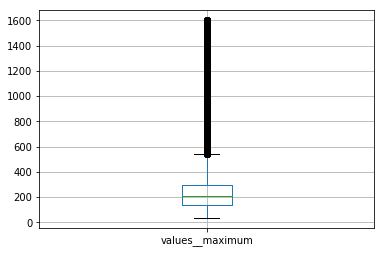

In [7]:
#Распределение максимума на скользящем окне(boxplot)
data.boxplot(column='values__maximum')

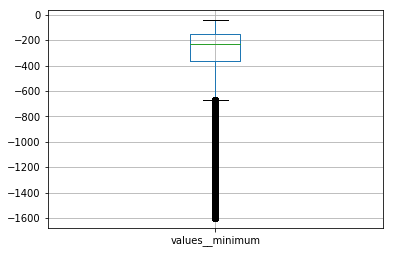

In [8]:
#Распределение минимума на скользящем окне(boxplot)
data.boxplot(column='values__minimum')

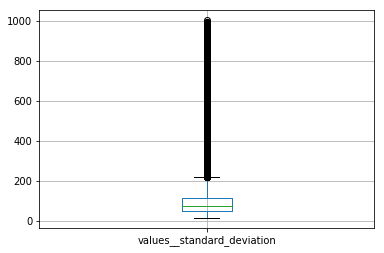

In [9]:
#Распределение стандартного отклонения на скользящем окне(boxplot)
data.boxplot(column='values__standard_deviation')

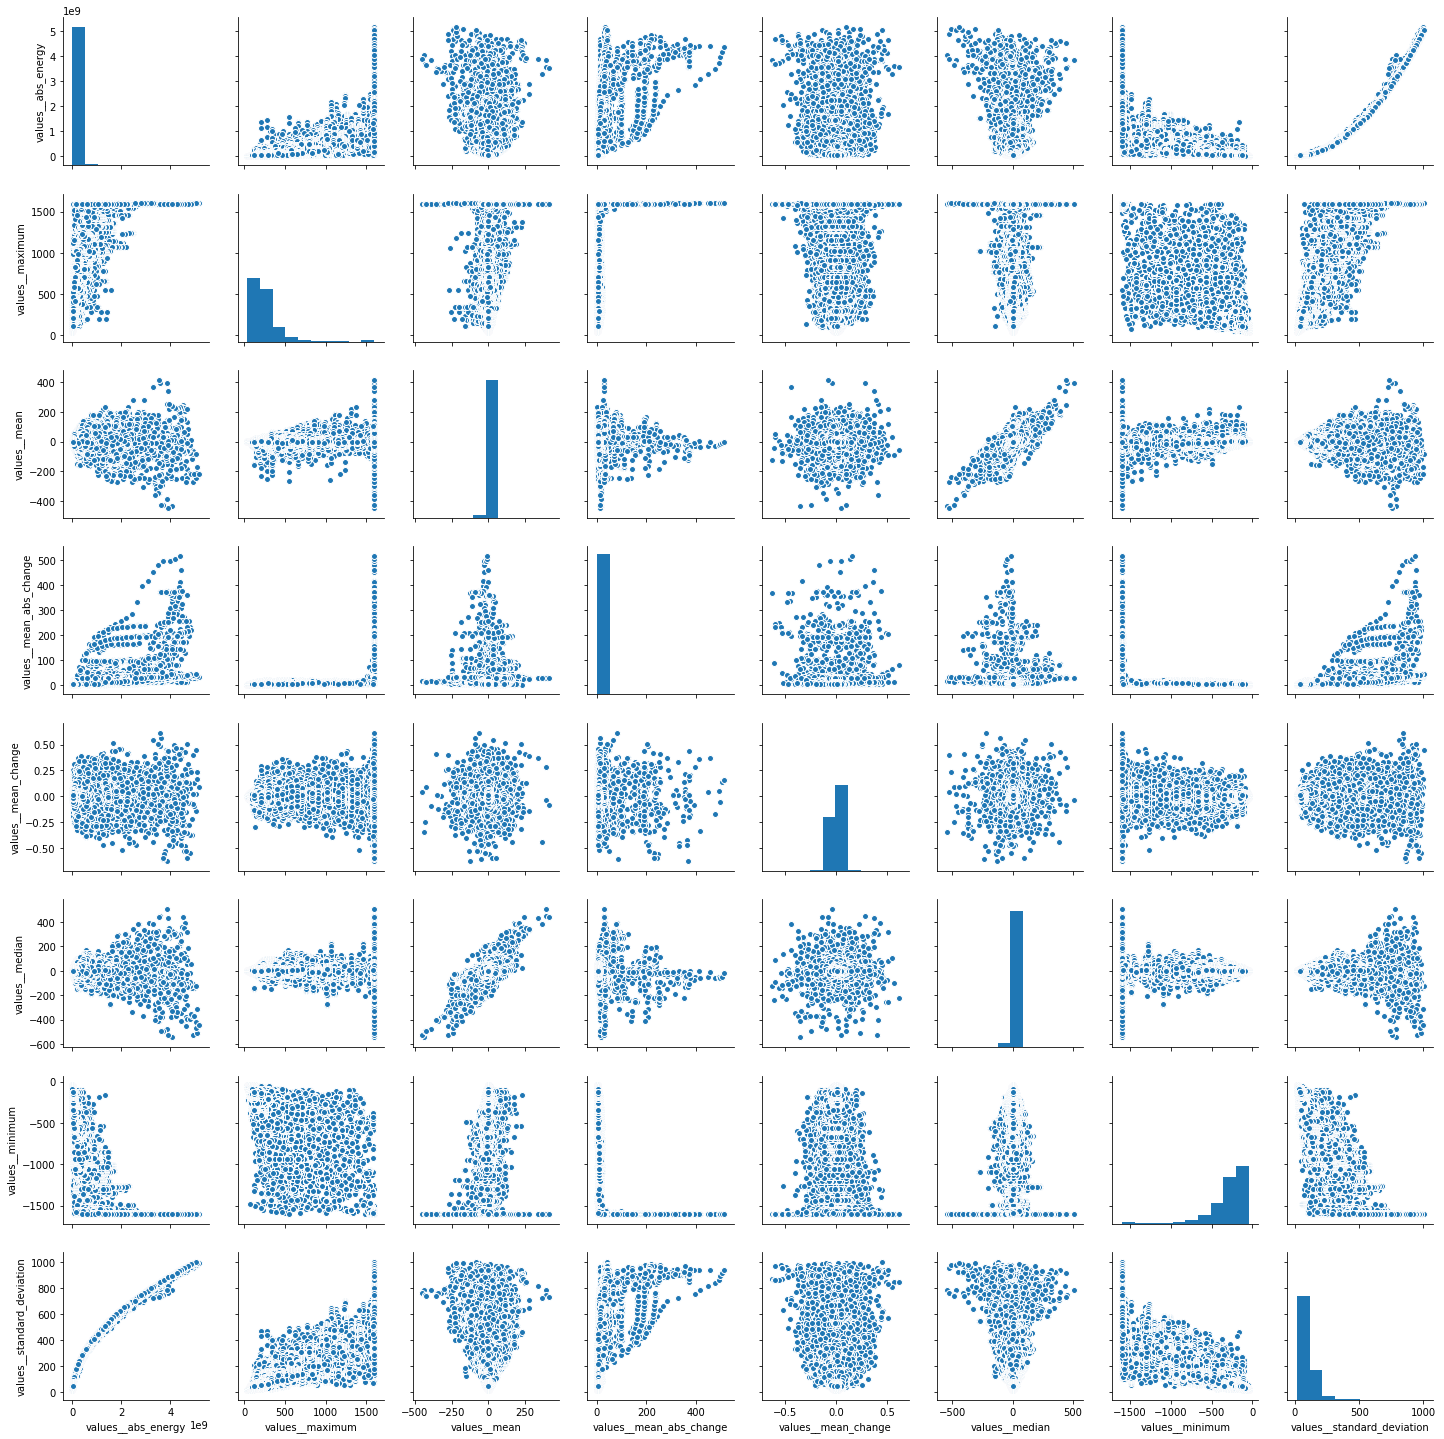

In [10]:
#Диаграммы попарного рассеивания признаков
sns.pairplot(data.drop(['id','Channel'],axis=1))

### Идентифицируем максимумы на окнах находящиеся выше 0.975%%(перцентили) по всей таблице как артефактные зашкалы и посмотрим как поменяется диаграмма рассеивания признаков

In [11]:
quantile=data.quantile([0.025,0.975])
cleardata=data[data['values__maximum']<quantile['values__maximum'][0.975]]

In [12]:
data['Class']=data['values__maximum'].map(lambda x: 1 if x<quantile['values__maximum'][0.975] else 0)

In [13]:
data['Class'].value_counts()

1    365242
0      9379
Name: Class, dtype: int64

In [14]:
data.head()

,id,values__abs_energy,values__maximum,values__mean,values__mean_abs_change,values__mean_change,values__median,values__minimum,values__standard_deviation,File,Channel,Class
Index,,,,,,,,,,,,
0,11,3.528788e+09,1599.462891,-91.359326,10.963296,0.018334,-194.067383,-1599.169922,835.111371,1.edf,4,0
1,12,3.425817e+09,1599.462891,-116.475449,10.756897,-0.286757,-181.958008,-1599.169922,819.510176,1.edf,4,0
2,13,3.213057e+09,1599.462891,-103.670303,9.940513,-0.135330,-156.542969,-1599.169922,794.898675,1.edf,4,0
3,14,2.948138e+09,1599.462891,-99.109629,9.064420,0.017552,-132.739258,-1599.169922,761.449162,1.edf,4,0
4,15,2.718801e+09,1599.462891,-119.135029,8.116955,0.128366,-158.251953,-1599.169922,727.713510,1.edf,4,0


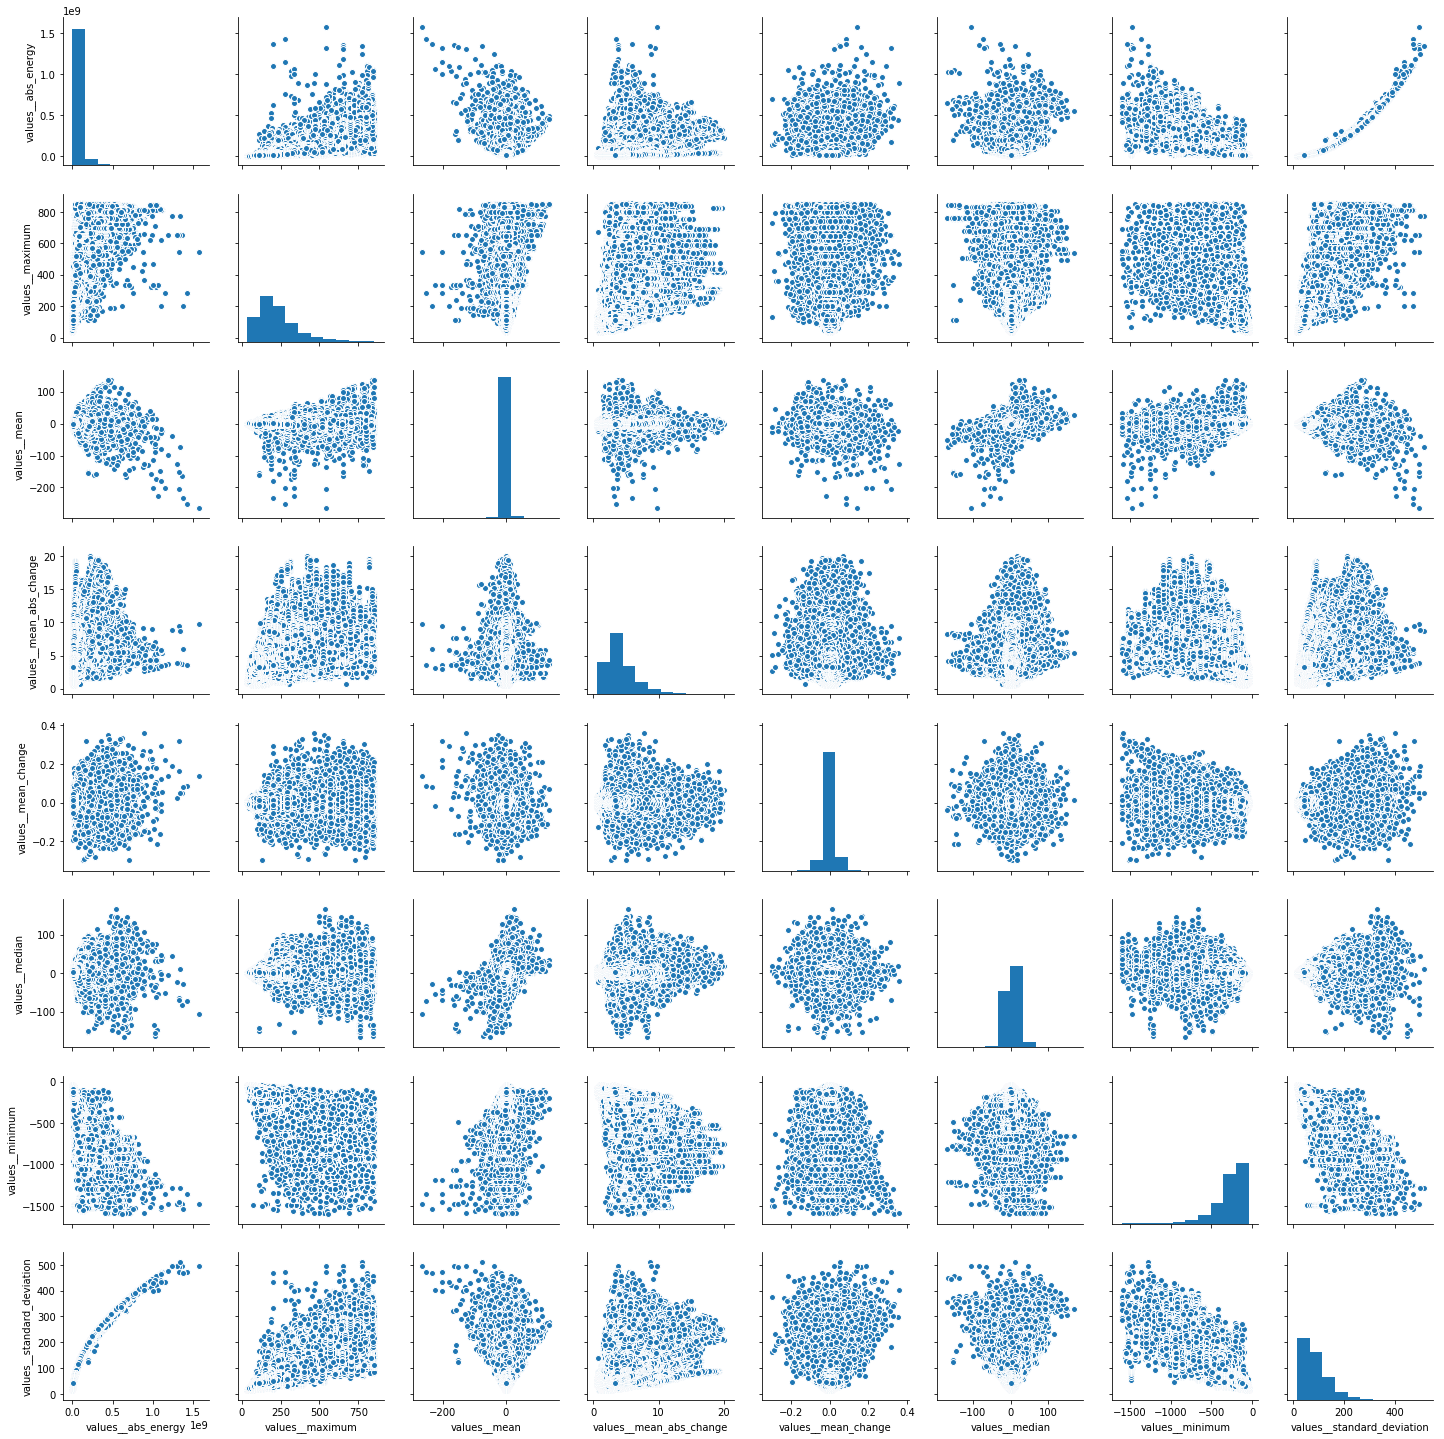

In [15]:
#Диаграмма рассеивания признаков
sns.pairplot(cleardata.drop(['id','Channel'],axis=1))

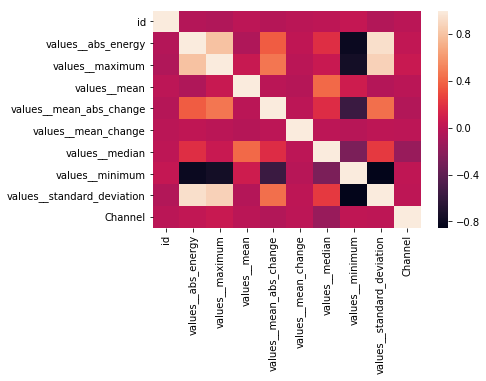

In [16]:
#Цветовая диаграмма корреляции признаков
sns.heatmap(cleardata.corr())

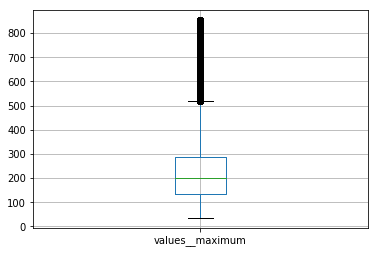

In [17]:
cleardata.boxplot(column='values__maximum')

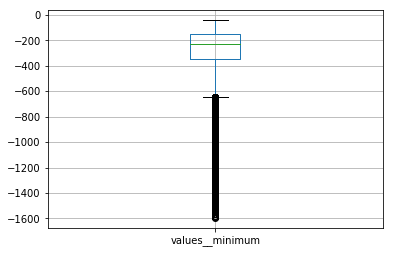

In [18]:
cleardata.boxplot(column='values__minimum')

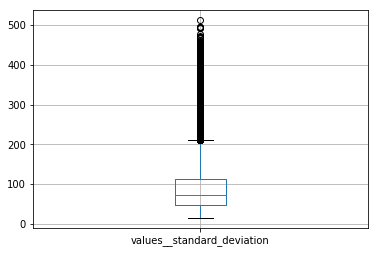

In [19]:
cleardata.boxplot(column='values__standard_deviation')

In [20]:
save_cls(data)